# CP-322 Mini Project 1

# Imports


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1

In [2]:
# Importing the data
# If you want to run it, change the path to what ever works for your computer
# Will also put the datasets in the zip folder with the code. 
# From our testing, it takes around 10 to 13 minutes to run the full code. Be patient when you're going to run it.

# Adult data
dataAdult = pd.read_csv('/kaggle/input/adult-data-csv-2/adult.csv')

# Ionosphere
ionosphere = pd.read_csv('/kaggle/input/ionosphere-data-csv/ionosphere_data_kaggle.csv')

# Iris data
iris = pd.read_csv('/kaggle/input/iris-data/Iris.csv')

# US cars data
us_cars = pd.read_csv('/kaggle/input/us-cars/USA_cars_datasets.csv')

datasets = {
    'dataAdult': dataAdult.head(),
    'ionosphere': ionosphere.head(),
    'iris': iris.head(),
    'us_cars': us_cars.head()
}

datasets

{'dataAdult':    age workclass  fnlwgt     education  education.num marital.status  \
 0   90         ?   77053       HS-grad              9        Widowed   
 1   82   Private  132870       HS-grad              9        Widowed   
 2   66         ?  186061  Some-college             10        Widowed   
 3   54   Private  140359       7th-8th              4       Divorced   
 4   41   Private  264663  Some-college             10      Separated   
 
           occupation   relationship   race     sex  capital.gain  \
 0                  ?  Not-in-family  White  Female             0   
 1    Exec-managerial  Not-in-family  White  Female             0   
 2                  ?      Unmarried  Black  Female             0   
 3  Machine-op-inspct      Unmarried  White  Female             0   
 4     Prof-specialty      Own-child  White  Female             0   
 
    capital.loss  hours.per.week native.country income  
 0          4356              40  United-States  <=50K  
 1          4356 

**Adult Data**

In [3]:
dataAdult.isin(['?']).sum()

dataAdult['workclass']=dataAdult['workclass'].replace('?',np.nan)    
dataAdult['occupation']=dataAdult['occupation'].replace('?',np.nan)  
dataAdult['native.country']=dataAdult['native.country'].replace('?',np.nan)  
# Drop the rows which has NaN rows 
dataAdult.dropna(how='any',inplace=True)
dataAdult.dropna()
print(dataAdult.columns)

dataAdult = dataAdult.drop(['education.num','age', 'hours.per.week', 'fnlwgt', 'capital.gain','capital.loss', 'native.country'], axis=1)

#income
dataAdult['income'] = dataAdult['income'].map({'<=50K': 0, '>50K': 1}).astype(int, errors='ignore')

#gender
dataAdult['sex'] = dataAdult['sex'].map({'Male': 0, 'Female': 1}).astype(int, errors='ignore')

#race
dataAdult['race'] = dataAdult['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int, errors='ignore')

#marital
dataAdult['marital.status'] = dataAdult['marital.status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int, errors='ignore')

#workclass
dataAdult['workclass'] = dataAdult['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int, errors='ignore')

#education
dataAdult['education'] = dataAdult['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int, errors='ignore')

#occupation
dataAdult['occupation'] = dataAdult['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 
 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-     serv':14}).astype(int, errors='ignore')

#relationship
dataAdult['relationship'] = dataAdult['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int, errors='ignore')

dataAdult.dropna()
dataAdult.columns
dataAdult.isnull().sum()

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


workclass           0
education           0
marital.status      0
occupation        644
relationship        0
race                0
sex                 0
income              0
dtype: int64

**Ionosphere**

In [4]:
# Cleaned ionosphere data

#rename last column from g and b to 1 and 0
ionosphere['label'].replace('b', 0, inplace = True)
ionosphere['label'].replace('g', 1, inplace = True)
ionosphere
#print(ionosphere.columns)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


**US Cars Data**

In [5]:
# Cleaned US cars data
#dropping an extra column
cars_df = pd.DataFrame(us_cars)
cars_df = cars_df.drop('Unnamed: 0', axis = 1)

# Makes mileage float into an int
for i in cars_df['mileage']:
    a = str(i)
    if a[-1] != str(0):
        print(a)       
cars_df['mileage'] = cars_df['mileage'].astype(int)

cars_df

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,9200,nissan,versa,2018,clean vehicle,34553,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,9200,nissan,versa,2018,clean vehicle,31594,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,9200,nissan,versa,2018,clean vehicle,32557,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


**Iris Data**

In [6]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
iris.drop_duplicates(inplace=True)
#replace species name with ints
iris['Species'].replace('Iris-setosa', 1, inplace = True)
iris['Species'].replace('Iris-versicolor', 2, inplace = True)
iris['Species'].replace('Iris-virginica', 3, inplace = True)
# iris = iris[iris['Species'] != 'Iris-virginica']

iris.drop('Id', axis=1, inplace=True)

iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


# Statistics on the data sets

In [8]:
# Adult data
dataAdult.describe()

,workclass,education,marital.status,occupation,relationship,race,sex,income
count,30162.000000,30162.000000,30162.000000,29518.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,4.571945,5.554638,3.228765,7.172437,2.818182,2.662290,0.324315,0.248922
std,1.349115,4.886865,1.438729,3.378217,1.869175,0.928641,0.468126,0.432396
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,2.000000,5.000000,0.000000,3.000000,0.000000,0.000000
50%,5.000000,3.000000,2.000000,7.000000,4.000000,3.000000,0.000000,0.000000
75%,5.000000,12.000000,5.000000,10.000000,4.000000,3.000000,1.000000,0.000000
max,6.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,1.000000


In [9]:
# Ionosphere
ionosphere.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480,0.641026
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337,0.480384
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350,0.000000
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000,1.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Iris 
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [11]:
# US cars
us_cars.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


# Task 2

In [12]:
#logistic regression
class LogisticRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-4):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, y, y_prediction):
        epsilon = 1e-15
        return -np.mean(y * np.log(y_prediction + epsilon) + (1 - y) * np.log(1 - y_prediction + epsilon))

    def gradient_descent(self, x, y):
        n = len(y)
        cost_history = []

        for i in range(self.max_iter):
            y_prediction = self.hypothesis(x)
            gradient = np.dot(x.T, (y_prediction - y)) / n
            self.theta -= self.learning_rate * gradient
            cost = self.cost_function(y, y_prediction)
            cost_history.append(cost)

            # Check convergence
            if len(cost_history) > 1 and abs(cost_history[-1] - cost_history[-2]) < self.tol:
                break

        return cost_history

    def fit(self, x, y):
        x_bias = np.hstack((np.ones((x.shape[0], 1)), x))
        self.theta = np.zeros(x_bias.shape[1])
        cost_history = self.gradient_descent(x_bias, y)
        return cost_history

    def predict(self, x):
        x_bias = np.hstack((np.ones((x.shape[0], 1)), x))
        probabilities = self.hypothesis(x_bias)
        return [1 if p >= 0.5 else 0 for p in probabilities]

    def hypothesis(self, x):
        return self.sigmoid(np.dot(x, self.theta))

    @staticmethod
    def evaluate_acc(y_true, y_pred):
        return np.sum(y_true == y_pred) / len(y_true)

    #k-fold cross-validation for Logistic regression
    @staticmethod
    def cross_validate_logistic(X, y, n_splits):
        # Shuffle the data
        shuffled_data = pd.concat([X, y], axis=1).sample(frac=1).reset_index(drop=True)

        # Split the data into k folds
        fold_size = len(shuffled_data) // n_splits
        accuracies = []

        for i in range(n_splits):
            # Split the data into training and validation sets for the current fold
            start_idx = i * fold_size
            end_idx = (i + 1) * fold_size if i != n_splits - 1 else None  # To handle the last fold

            val_data = shuffled_data.iloc[start_idx:end_idx]
            train_data = shuffled_data.drop(val_data.index)

            # Separate the features and labels
            X_train = train_data.drop(columns=y.name)
            y_train = train_data[y.name]
            X_val = val_data.drop(columns=y.name)
            y_val = val_data[y.name]

            # Train the model and validate
            model = LogisticRegression()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            accuracy = np.mean(y_val == y_pred)
            accuracies.append(accuracy)

        return np.mean(accuracies)

In [13]:
# K-Nearest neighbor KNN
from collections import Counter

class KNN:
    # initializing KNN
    def __init__(self, k):
        self.k = k
    
    # Fit function to store training data
    def fit(self, X_train, y):
        self.X_train = X_train
        # Check if y is a pandas DataFrame or Series, if so, reset the index
        if isinstance(y, (pd.DataFrame, pd.Series)):
            self.y_train = y.reset_index(drop=True).values
        else:
            self.y_train = y

    
    # Computing the distance between two points using the Euclidean distance function
    @staticmethod
    def distance(x1, x2):
        return np.linalg.norm(x1 - x2, axis=1)
    
    """
    Predict function runs a loop for every test data point, each time calculating distance between the test instance and every training instance. 
    It stores distance and index of the training data together in a 2D list. 
    Then sorts that list based on distance and then updates the list keeping only the K shortest distances(along with their indices) in the list.
    Then pulls out labels corresponding to those K nearest data points and checks which label has the majority using Counter. 
    That majority label becomes the label of the test data point.
    """
    def predict(self, X_test):
        X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
        predictions = []
        for x in X_test:
            distances = self.distance(self.X_train, x)
            k_indices = distances.argsort()[:self.k]  # Get the indices of the k smallest distances
            k_nearest_labels = self.y_train[k_indices]
            most_common = np.bincount(k_nearest_labels).argmax()
            predictions.append(most_common)
        return predictions
        
# Function to run k-fold cross-validation for KNN
def cross_validation_knn(X,y, k_list, n_splits):
    # Check if X and y are pandas DataFrame or Series, if so, convert them to numpy arrays
    if isinstance(X, (pd.DataFrame, pd.Series)):
        X = X.values
    if isinstance(y, (pd.DataFrame, pd.Series)):
        y = y.values
    fold_size = len(X) // n_splits  # size of each fold
    indices = np.arange(len(X))  # create an array
    np.random.shuffle(indices)  # shuffle the indices

    k_accuracies = {}  # Dictionary to store accuracies for each k

    for k in k_list:
        accuracies = []

        for i in range(n_splits):
            # Splitting the data into training and validation based on current fold
            test_indices = indices[i * fold_size:(i + 1) * fold_size]
            train_indices = np.setdiff1d(indices, test_indices)

            X_train, X_val = X[train_indices], X[test_indices]
            y_train, y_val = y[train_indices], y[test_indices]

            # Initializing KNN and training
            knn = KNN(k=k)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_val)

            # Evaluating accuracy
            accuracy = np.sum(y_val == y_pred) / len(y_val)
            accuracies.append(accuracy)

        # Storing mean accuracy for the current k value
        k_accuracies[k] = np.mean(accuracies)

    return k_accuracies
# Accuracy function
def evaluate_acc_knn(y_true, y_pred):
    # check if both have the same length
    if len(y_true) != len(y_pred):
        print("Input arrays must have the same length")
    else:
        return np.sum(y_true == y_pred)/len(y_true)

# Task 3

# Testing Adult Data

In [14]:
# Selecting relevant columns for x and y
df_x = dataAdult[['relationship','education','race','occupation','sex','marital.status','workclass']]
df_y = dataAdult['income']

# Splitting the dataset into training and testing sets (80-20 split)
np.random.seed(42)
shuffled_indices = np.random.permutation(len(df_x))

# Determine the split index based on the desired ratio (80-20 split)
train_indices = shuffled_indices[:int(0.8 * len(df_x))]
test_indices = shuffled_indices[int(0.8 * len(df_x)):]

# Split the data based on the shuffled indices
x_train = df_x.iloc[train_indices]
x_test = df_x.iloc[test_indices]
y_train = df_y.iloc[train_indices]
y_test = df_y.iloc[test_indices]

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24129, 7), (6033, 7), (24129,), (6033,))

In [15]:
x_train.fillna(x_train.mean(), inplace=True)
x_test.fillna(x_train.mean(), inplace=True)

# Check for NaN or inf values in the training and testing datasets
nan_in_train = x_train.isnull().sum().sum()
nan_in_test = x_test.isnull().sum().sum()

print("NaN in training:", nan_in_train)
print("NaN in testing:", nan_in_test)

NaN in training: 0
NaN in testing: 0


/tmp/ipykernel_20/1969342037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.fillna(x_train.mean(), inplace=True)
/tmp/ipykernel_20/1969342037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.fillna(x_train.mean(), inplace=True)


**Logistic Regression**

In [16]:
logisticModel = LogisticRegression()
logisticModel.fit(x_train, y_train)

predictions = logisticModel.predict(x_test)
print("predictions: ",predictions)

# checking the accuracy of the model
accuracy = LogisticRegression.evaluate_acc(y_test, predictions)
print("Accuracy: ", accuracy)

# running the cross-validation function
avg_accuracy = LogisticRegression.cross_validate_logistic(x_train, y_train, n_splits=5)
print(f"The average accuracy from k-fold cross-validation is: {avg_accuracy}")

predictions:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

The models performance on the validation sets during k-fold cross-validation is quite close to its performance on the test set. This is a good sign as it indicates consistency in the model's performance across different data splits.

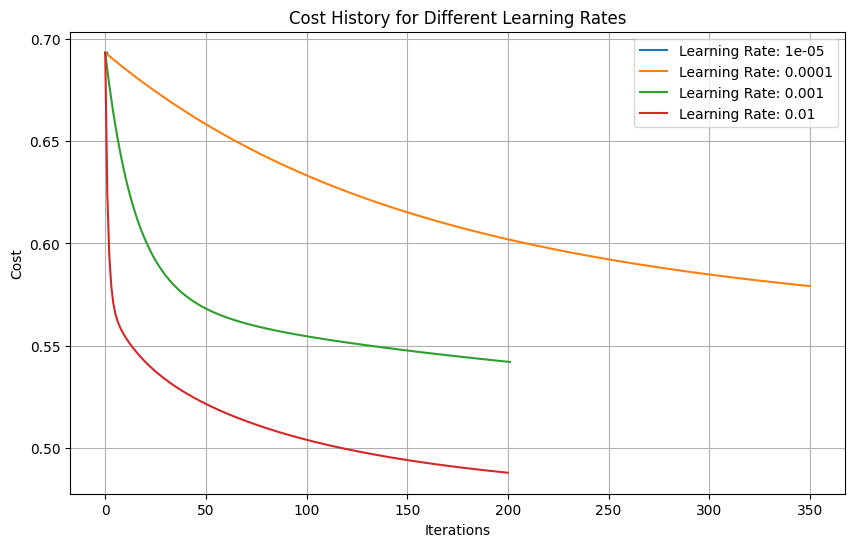

In [17]:
# Testing different learning rates and plotting the cost history
learning_rates = [0.00001, 0.0001, 0.001, 0.01]
cost_histories = {}

for lr in learning_rates:
    model = LogisticRegression(learning_rate=lr)
    cost_histories[lr] = model.fit(x_train, y_train)

# Plotting the cost histories for different learning rates
plt.figure(figsize=(10, 6))
for lr, history in cost_histories.items():
    plt.plot(history, label=f"Learning Rate: {lr}")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost History for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

**KNN**

In [18]:
KNearNeighbor = KNN(k=5)  # Using k=5
KNearNeighbor.fit(x_train, y_train)

# Predict the labels for the test data
knn_predictions = KNearNeighbor.predict(x_test)
print("KNN Predictions: ", knn_predictions)

# Evaluate the accuracy of the KNN model using the test data
knn_accuracy = evaluate_acc_knn(y_test, knn_predictions)
print("KNN Accuracy: ", knn_accuracy)

# Run k-fold cross-validation for the KNN model
k_list = list(range(1,6))  # You can modify this list to test different values of k, in this case its 1-5
k_accuracies = cross_validation_knn(x_train, y_train, k_list, n_splits=5)

# Print the accuracies for different values of k
for k, acc in k_accuracies.items():
    print(f"CV Accuracy for k={k}: {acc}")

KNN Predictions:  [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 

Accuracy of approximately 80.06% for the KNN algorithm

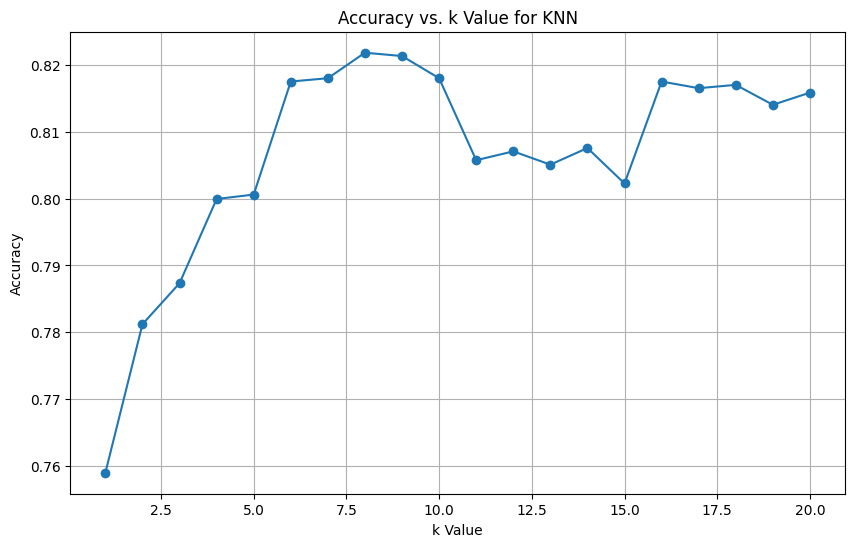

In [19]:
k_values = list(range(1, 21))  # Testing k from 1 to 20
accuracies = []

# For each k value, train the KNN model and evaluate its accuracy
for k in k_values:
    knnModelTemp = KNN(k=k)
    knnModelTemp.fit(x_train, y_train)
    knn_predictions_temp = knnModelTemp.predict(x_test)
    accuracy = evaluate_acc_knn(y_test, knn_predictions_temp)
    accuracies.append(accuracy)

# Plot k values against accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k Value for KNN')
plt.grid(True)
plt.show()

The accuracy seems to be increasing steadily until the 9th k-value and then from there it dips approximately 1-2% until the 15th k-value and then increases from there on. While increasing k initially leads to a more stable model by reducing sensitivity to noise, there's a tipping point beyond which the model starts losing accuracy. It appears this tipping point is around the 9th k-value.

# Testing Ionosphere Data

In [20]:
#Train-test split
X_iono = ionosphere[['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
       'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
       'feature17', 'feature18', 'feature19', 'feature20', 'feature21',
       'feature22', 'feature23', 'feature24', 'feature25', 'feature26',
       'feature27', 'feature28', 'feature29', 'feature30', 'feature31',
       'feature32', 'feature33', 'feature34']]
y_iono = ionosphere['label']

#80-20 ratio
train_size = int(0.8 * len(ionosphere))
x_train_iono, x_test_iono = X_iono[:train_size], X_iono[train_size:]
y_train_iono, y_test_iono = y_iono[:train_size], y_iono[train_size:]

**Logistic Regression**

In [21]:
logisticModel = LogisticRegression()
logisticModel.fit(x_train_iono, y_train_iono)

cost_history = logisticModel.fit(x_train_iono, y_train_iono)
print("cost history: ",cost_history)

predictions = logisticModel.predict(x_test_iono)
print("predictions: ",predictions)

# checking the accuracy of the model
accuracy = logisticModel.evaluate_acc(y_test_iono, predictions)
print("Accuracy: ", accuracy)

# running the cross-validation function
avg_accuracy = LogisticRegression.cross_validate_logistic(X_iono, y_iono, 3)
print(f"The average accuracy from k-fold cross-validation is: {avg_accuracy}")

cost history:  [0.6931471805599434, 0.6910522755117757, 0.6890146207755399, 0.6870323519559483, 0.6851036610139141, 0.6832267951660993, 0.6814000557460611, 0.67962179703404, 0.6778904250618686, 0.6762043963989419, 0.6745622169246799, 0.6729624405924269, 0.6714036681892713, 0.6698845460958363, 0.6684037650496892, 0.6669600589156319, 0.665552203465782, 0.6641790151720239, 0.6628393500131011, 0.661532102298338, 0.660256203509718, 0.659010621163801, 0.6577943576947465, 0.6566064493595009, 0.6554459651660263, 0.6543120058252786, 0.6532037027274881, 0.6521202169431606, 0.65106073824909, 0.6500244841795618, 0.6490106991028239, 0.6480186533228188, 0.6470476422060795, 0.6460969853336329, 0.6451660256776843, 0.6442541288028034, 0.6433606820912896, 0.6424850939923451, 0.6416267932946583, 0.6407852284219623, 0.6399598667511146, 0.6391501939522197, 0.6383557133503008, 0.6375759453080156, 0.6368104266289011, 0.6360587099806195, 0.6353203633376855, 0.6345949694431403, 0.6338821252886453, 0.6331814416

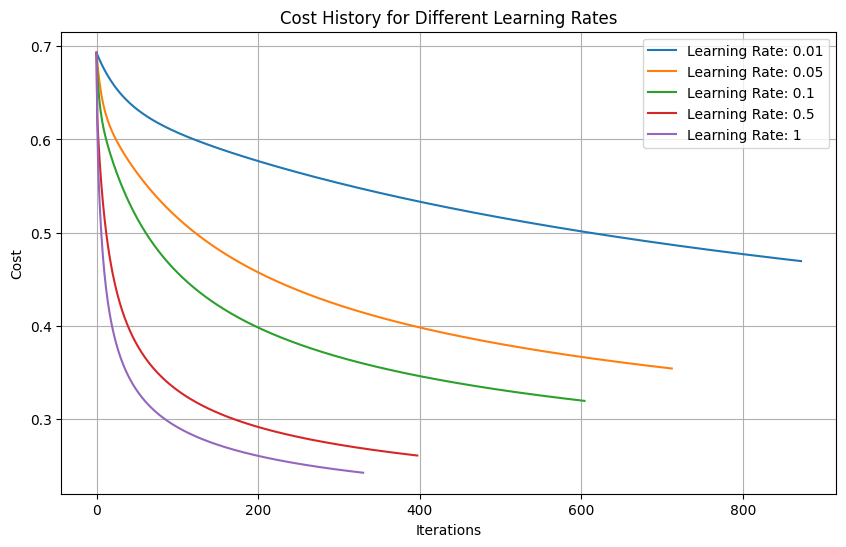

In [22]:
# Testing different learning rates and plotting the cost history
learning_rates = [0.01, 0.05, 0.1, 0.5, 1]
cost_histories = {}

for lr in learning_rates:
    model = LogisticRegression(learning_rate=lr)
    cost_histories[lr] = model.fit(x_train_iono, y_train_iono)

# Plotting the cost histories for different learning rates
plt.figure(figsize=(10, 6))
for lr, history in cost_histories.items():
    plt.plot(history, label=f"Learning Rate: {lr}")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost History for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

**KNN**

In [23]:
KNearNeighbor = KNN(k=5)  # Using k=5
KNearNeighbor.fit(x_train_iono, y_train_iono)

# Predict the labels for the test data
knn_predictions = KNearNeighbor.predict(x_test_iono)
print("KNN Predictions: ", knn_predictions)

# Evaluate the accuracy of the KNN model using the test data
knn_accuracy = evaluate_acc_knn(y_test_iono, knn_predictions)
print("KNN Accuracy: ", knn_accuracy)

# Run k-fold cross-validation for the KNN model
k_list = list(range(1,6))  # You can modify this list to test different values of k, in this case its 1-5
k_accuracies = cross_validation_knn(x_train_iono, y_train_iono, k_list, n_splits=5)

# Print the accuracies for different values of k
for k, acc in k_accuracies.items():
    print(f"CV Accuracy for k={k}: {acc}")

KNN Predictions:  [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
KNN Accuracy:  0.971830985915493
CV Accuracy for k=1: 0.8678571428571429
CV Accuracy for k=2: 0.9
CV Accuracy for k=3: 0.8321428571428571
CV Accuracy for k=4: 0.8607142857142858
CV Accuracy for k=5: 0.8142857142857143


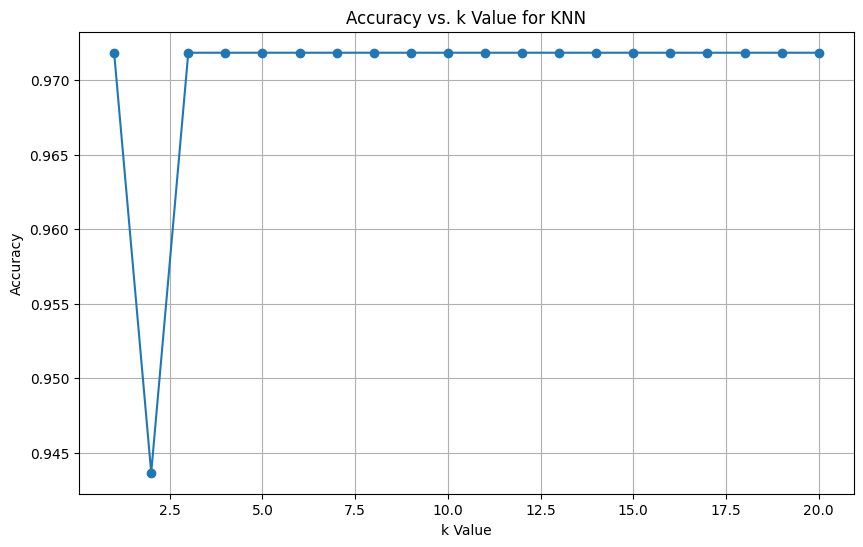

In [24]:
k_values = list(range(1, 21))  # Testing k from 1 to 20
accuracies = []

# For each k value, train the KNN model and evaluate its accuracy
for k in k_values:
    knnModelTemp = KNN(k=k)
    knnModelTemp.fit(x_train_iono, y_train_iono)
    knn_predictions_temp = knnModelTemp.predict(x_test_iono)
    accuracy = evaluate_acc_knn(y_test_iono, knn_predictions_temp)
    accuracies.append(accuracy)

# Plot k values against accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k Value for KNN')
plt.grid(True)
plt.show()

# Testing Iris Data

In [25]:
X_iris = iris.iloc[:,0:4]
Y_iris = iris["Species"]

train_size = int(0.8 * len(iris))
x_train_iris, x_test_iris = X_iris[:train_size], X_iris[train_size:]
y_train_iris, y_test_iris = Y_iris[:train_size], Y_iris[train_size:]

iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


**Logistic Regression**

In [26]:
logisticModel = LogisticRegression(learning_rate = 0.001)
logisticModel.fit(x_train_iris, y_train_iris)

cost_history = logisticModel.fit(x_train_iris, y_train_iris)
print("cost history: ",cost_history)

predictions = logisticModel.predict(x_test_iris)
print("predictions: ",predictions)

# checking the accuracy of the model
accuracy = logisticModel.evaluate_acc(y_test_iris, predictions)
print("Accuracy: ", accuracy)

# running the cross-validation function
avg_accuracy = LogisticRegression.cross_validate_logistic(X_iris, Y_iris, 5)
print(f"The average accuracy from k-fold cross-validation is: {avg_accuracy}")

cost history:  [0.6931471805599435, 0.5915201599797876, 0.492714348010015, 0.3966400136276161, 0.30320244404186575, 0.21230329587564362, 0.1238418525691535, 0.03771616736705889, -0.04617592085074083, -0.12793590463066715, -0.2076638577859678, -0.285457813309505, -0.36141326129242235, -0.4356227565469324, -0.5081756243599721, -0.5791577523144903, -0.6486514562244184, -0.7167354087704931, -0.7834846202525714, -0.8489704618717561, -0.9132607230304965, -0.9764196952226866, -1.0385082761308968, -1.0995840885232253, -1.1597016094297374, -1.2189123058698066, -1.2772647740954512, -1.3348048799153343, -1.3915758981757358, -1.4476186499065193, -1.5029716360004965, -1.557671166592552, -1.6117514855487116, -1.6652448896729373, -1.71818184239788, -1.7705910818513964, -1.822499723288862, -1.8739333559569666, -1.9249161345117913, -1.9754708651560478, -2.025619086690232, -2.075381146692615, -2.124776273055392, -2.173822641110659, -2.2225374365814665, -2.270936914591228, -2.31903645496, -2.366850614009

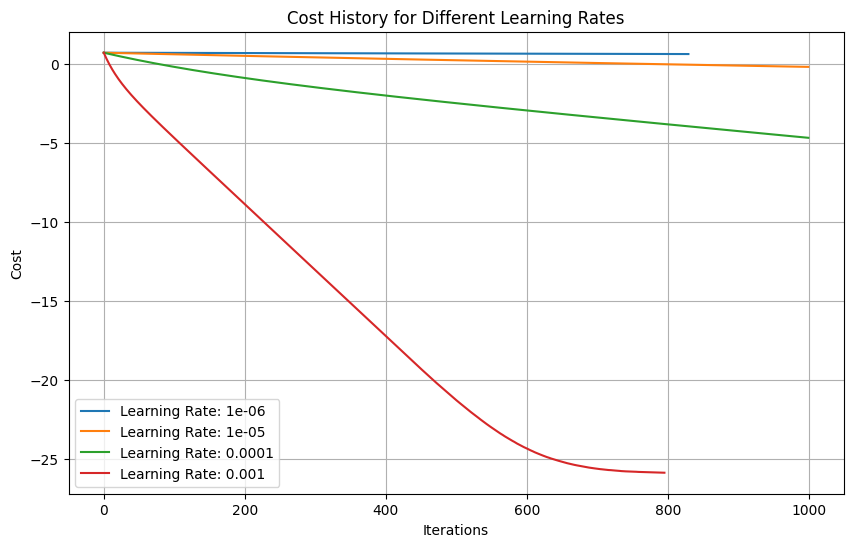

In [27]:
# Testing different learning rates and plotting the cost history
learning_rates = [0.000001, 0.00001, 0.0001, 0.001]
cost_histories = {}

for lr in learning_rates:
    model = LogisticRegression(learning_rate=lr)
    cost_histories[lr] = model.fit(x_train_iris, y_train_iris)

# Plotting the cost histories for different learning rates
plt.figure(figsize=(10, 6))
for lr, history in cost_histories.items():
    plt.plot(history, label=f"Learning Rate: {lr}")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost History for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

**KNN**

In [28]:
KNearNeighbor = KNN(k=5)  # Using k=5
KNearNeighbor.fit(x_train_iris, y_train_iris)

# Predict the labels for the test data
x_test_iris = x_test_iris.astype(float)
knn_predictions = KNearNeighbor.predict(x_test_iris)
print("KNN Predictions: ", knn_predictions)

# Evaluate the accuracy of the KNN model using the test data
knn_accuracy = evaluate_acc_knn(y_test_iris, knn_predictions)
print("KNN Accuracy: ", knn_accuracy)

# Run k-fold cross-validation for the KNN model
k_list = list(range(1,6))  # You can modify this list to test different values of k, in this case its 1-5
k_accuracies = cross_validation_knn(x_train_iris, y_train_iris, k_list, n_splits=5)

# Print the accuracies for different values of k
for k, acc in k_accuracies.items():
    print(f"CV Accuracy for k={k}: {acc}")

KNN Predictions:  [3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2]
KNN Accuracy:  0.8
CV Accuracy for k=1: 0.975
CV Accuracy for k=2: 0.9666666666666666
CV Accuracy for k=3: 0.975
CV Accuracy for k=4: 0.95
CV Accuracy for k=5: 0.9666666666666668


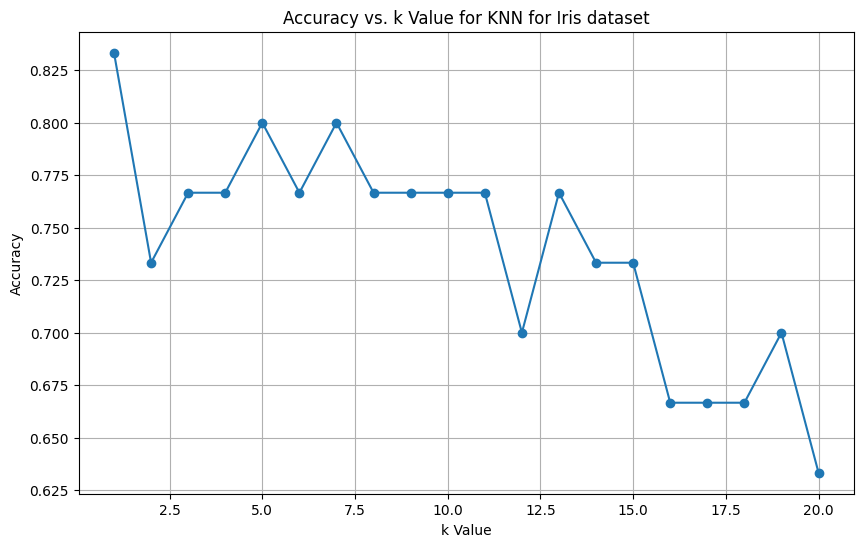

In [29]:
k_values = list(range(1, 21))  # Testing k from 1 to 20
accuracies = []

# For each k value, train the KNN model and evaluate its accuracy
for k in k_values:
    knnModelTemp = KNN(k=k)
    knnModelTemp.fit(x_train_iris, y_train_iris)
    knn_predictions_temp = knnModelTemp.predict(x_test_iris)
    accuracy = evaluate_acc_knn(y_test_iris, knn_predictions_temp)
    accuracies.append(accuracy)

# Plot k values against accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k Value for KNN for Iris dataset')
plt.grid(True)
plt.show()

# Testing US Cars Data

In [30]:
# Clean the data and drop some irrelavant columns
cars_df = pd.DataFrame(us_cars)
cars_df = cars_df.drop('Unnamed: 0', axis = 1)
cars_df.drop(columns=['vin', 'lot', 'country'], inplace = True)
cars_df.drop(columns=['brand', 'model', 'color', 'state', 'condition'], inplace=True)


# Make sure the mileage is the right datatype
cars_df['mileage'] = cars_df ['mileage'].astype(int)
title_status = (cars_df.pop('title_status'))
cars_df.insert(3, 'title_status', title_status)

cars_df['title_status'] = cars_df['title_status'].replace({'clean vehicle': 1, 'salvage insurance': 0})

#80-20 ratio
y_cars = cars_df['title_status']
X_cars = cars_df[['year', 'mileage', 'price']]

train_size = int(0.8 * len(cars_df))
x_train_cars, x_test_cars = X_cars[:train_size], X_cars[train_size:]
y_train_cars, y_test_cars = y_cars[:train_size], y_cars[train_size:]

**Logistic Regression**

In [31]:
# # cars_df
logisticModel = LogisticRegression(learning_rate = 0.00001)
logisticModel.fit(x_train_cars, y_train_cars)

cost_history = logisticModel.fit(x_train_cars, y_train_cars)
print("cost history: ",cost_history)

predictions = logisticModel.predict(x_test_cars)
print("predictions: ",predictions)

# # checking the accuracy of the model
accuracy = logisticModel.evaluate_acc(y_test_cars, predictions)
print("Accuracy: ", str(accuracy *100) + "%")

avg_accuracy = LogisticRegression.cross_validate_logistic(X_cars, y_cars, 3)
print(f"The average accuracy from k-fold cross-validation is: " + str(avg_accuracy*100) + "%")

cost history:  [0.6931471805599434, 2.389289451209393, 2.3835762917566146, 17.826329632277854, 2.415330276518873, 2.4112541066285935, 2.407045797156262, 9.878698137916347, 2.4181576676853207, 2.4151406486060654, 3.953893412732411, 2.41658097882221, 2.0268232890645654, 16.434181076447814, 2.4189238095485215, 2.4189238095485215]
predictions:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

/tmp/ipykernel_20/2068660570.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipykernel_20/2068660570.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipykernel_20/2068660570.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipykernel_20/2068660570.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipykernel_20/2068660570.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipykernel_20/2068660570.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipykernel_20/2068660570.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipykernel_20/2068660570.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipykernel_20/2068660570.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipyke

/tmp/ipykernel_20/2068660570.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipykernel_20/2068660570.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipykernel_20/2068660570.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/tmp/ipykernel_20/2068660570.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


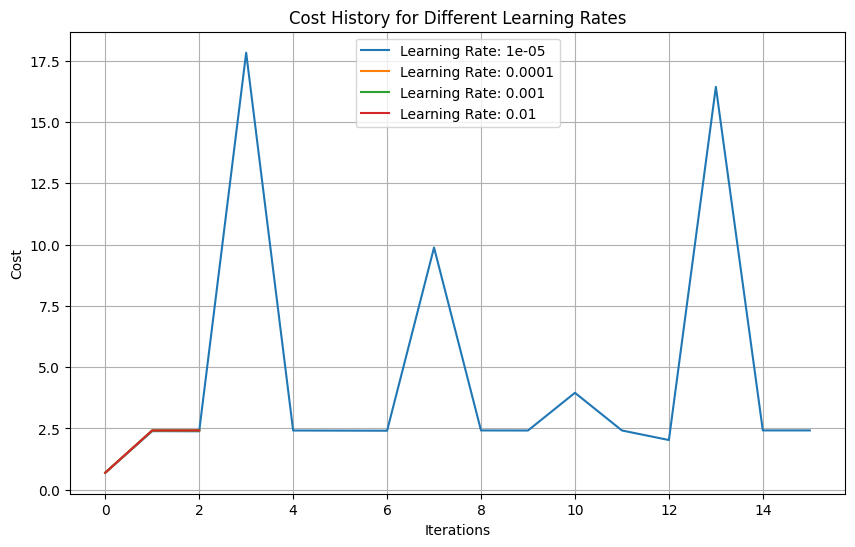

In [32]:
# Testing different learning rates and plotting the cost history
learning_rates = [0.00001, 0.0001, 0.001, 0.01]
cost_histories = {}

for lr in learning_rates:
    model = LogisticRegression(learning_rate=lr)
    cost_histories[lr] = model.fit(x_train_cars, y_train_cars)

# Plotting the cost histories for different learning rates
plt.figure(figsize=(10, 6))
for lr, history in cost_histories.items():
    plt.plot(history, label=f"Learning Rate: {lr}")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost History for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

**KNN**

In [33]:
KNearNeighbor = KNN(k=3)  # Using k=3 as default = KNN(k=3)  # Using k=3 as default
KNearNeighbor.fit(x_train_cars, y_train_cars)

# 2. Predict the labels for the test data
knn_predictions = KNearNeighbor.predict(x_test_cars)
print("KNN Predictions: ", knn_predictions)

# 3. Evaluate the accuracy of the KNN model using the test data
knn_accuracy = evaluate_acc_knn(y_test_cars, knn_predictions)
print("KNN Accuracy: " + str(knn_accuracy*100) + "%")

# 4. Run k-fold cross-validation for the KNN model
k_list = [1, 3, 5, 7, 9, 11]  # You can modify this list to test different values of k
k_accuracies = cross_validation_knn(X_cars, y_cars, k_list, 3)

# Print the accuracies for different values of k
for k, acc in k_accuracies.items():
    print(f"Accuracy for k={k}: {acc}")

KNN Predictions:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

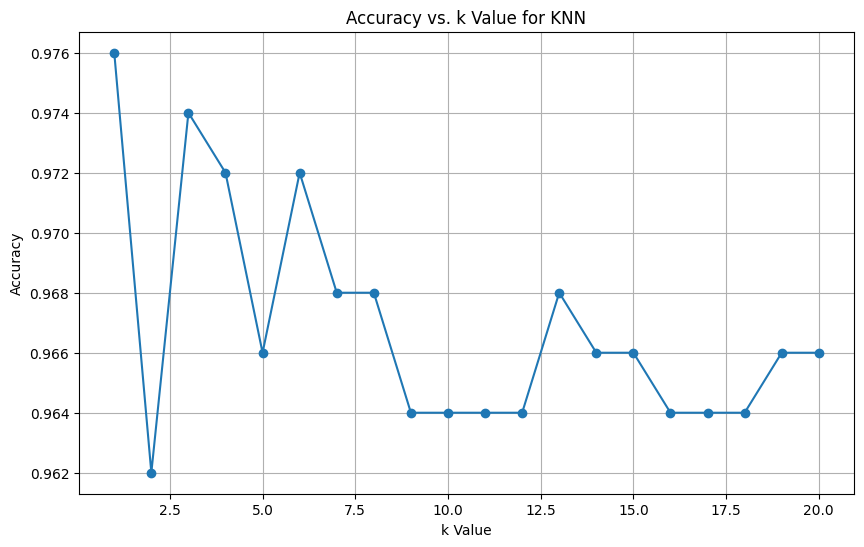

In [34]:
k_values = list(range(1, 21))  # Testing k from 1 to 20
accuracies = []

# For each k value, train the KNN model and evaluate its accuracy
for k in k_values:
    knnModelTemp = KNN(k=k)
    knnModelTemp.fit(x_train_cars, y_train_cars)
    knn_predictions_temp = knnModelTemp.predict(x_test_cars)
    accuracy = evaluate_acc_knn(y_test_cars, knn_predictions_temp)
    accuracies.append(accuracy)

# Plot k values against accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k Value for KNN')
plt.grid(True)
plt.show()